### Imports

In [141]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
import statsmodels.api as sm

from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from scipy import stats
from statsmodels.stats import weightstats

### Reading dataset

In [60]:
X=pd.read_excel('C:/Users/Kaumil/Documents/machine learning stuff/Python files/claims.csv.xlsx')
X.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [61]:
list(X)

['Month',
 'WeekOfMonth',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'WeekOfMonthClaimed',
 'Sex',
 'MaritalStatus',
 'Age',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'FraudFound_P',
 'PolicyNumber',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'Year',
 'BasePolicy']

### Finding interaction terms

In [62]:
X[(X['BasePolicy']=='Liability') & (X['FraudFound_P']==1) ].count()

Month                   36
WeekOfMonth             36
DayOfWeek               36
Make                    36
AccidentArea            36
DayOfWeekClaimed        36
MonthClaimed            36
WeekOfMonthClaimed      36
Sex                     36
MaritalStatus           36
Age                     36
Fault                   36
PolicyType              36
VehicleCategory         36
VehiclePrice            36
FraudFound_P            36
PolicyNumber            36
RepNumber               36
Deductible              36
DriverRating            36
Days_Policy_Accident    36
Days_Policy_Claim       36
PastNumberOfClaims      36
AgeOfVehicle            36
AgeOfPolicyHolder       36
PoliceReportFiled       36
WitnessPresent          36
AgentType               36
NumberOfSuppliments     36
AddressChange_Claim     36
NumberOfCars            36
Year                    36
BasePolicy              36
dtype: int64

In [63]:
X[(X['BasePolicy']=='All Perils') & (X['FraudFound_P']==1) ].count()

Month                   452
WeekOfMonth             452
DayOfWeek               452
Make                    452
AccidentArea            452
DayOfWeekClaimed        452
MonthClaimed            452
WeekOfMonthClaimed      452
Sex                     452
MaritalStatus           452
Age                     452
Fault                   452
PolicyType              452
VehicleCategory         452
VehiclePrice            452
FraudFound_P            452
PolicyNumber            452
RepNumber               452
Deductible              452
DriverRating            452
Days_Policy_Accident    452
Days_Policy_Claim       452
PastNumberOfClaims      452
AgeOfVehicle            452
AgeOfPolicyHolder       452
PoliceReportFiled       452
WitnessPresent          452
AgentType               452
NumberOfSuppliments     452
AddressChange_Claim     452
NumberOfCars            452
Year                    452
BasePolicy              452
dtype: int64

In [64]:
X[(X['BasePolicy']=='Collision') & (X['FraudFound_P']==1) ].count()

Month                   435
WeekOfMonth             435
DayOfWeek               435
Make                    435
AccidentArea            435
DayOfWeekClaimed        435
MonthClaimed            435
WeekOfMonthClaimed      435
Sex                     435
MaritalStatus           435
Age                     435
Fault                   435
PolicyType              435
VehicleCategory         435
VehiclePrice            435
FraudFound_P            435
PolicyNumber            435
RepNumber               435
Deductible              435
DriverRating            435
Days_Policy_Accident    435
Days_Policy_Claim       435
PastNumberOfClaims      435
AgeOfVehicle            435
AgeOfPolicyHolder       435
PoliceReportFiled       435
WitnessPresent          435
AgentType               435
NumberOfSuppliments     435
AddressChange_Claim     435
NumberOfCars            435
Year                    435
BasePolicy              435
dtype: int64

In [65]:
X[(X['Fault']=='Policy Holder') & (X['FraudFound_P']==1) & (X['AccidentArea']=='Rural')].count()

Month                   130
WeekOfMonth             130
DayOfWeek               130
Make                    130
AccidentArea            130
DayOfWeekClaimed        130
MonthClaimed            130
WeekOfMonthClaimed      130
Sex                     130
MaritalStatus           130
Age                     130
Fault                   130
PolicyType              130
VehicleCategory         130
VehiclePrice            130
FraudFound_P            130
PolicyNumber            130
RepNumber               130
Deductible              130
DriverRating            130
Days_Policy_Accident    130
Days_Policy_Claim       130
PastNumberOfClaims      130
AgeOfVehicle            130
AgeOfPolicyHolder       130
PoliceReportFiled       130
WitnessPresent          130
AgentType               130
NumberOfSuppliments     130
AddressChange_Claim     130
NumberOfCars            130
Year                    130
BasePolicy              130
dtype: int64

In [66]:
X[(X['Fault']=='Policy Holder') & (X['FraudFound_P']==1) & (X['AccidentArea']=='Urban')].count()

Month                   756
WeekOfMonth             756
DayOfWeek               756
Make                    756
AccidentArea            756
DayOfWeekClaimed        756
MonthClaimed            756
WeekOfMonthClaimed      756
Sex                     756
MaritalStatus           756
Age                     756
Fault                   756
PolicyType              756
VehicleCategory         756
VehiclePrice            756
FraudFound_P            756
PolicyNumber            756
RepNumber               756
Deductible              756
DriverRating            756
Days_Policy_Accident    756
Days_Policy_Claim       756
PastNumberOfClaims      756
AgeOfVehicle            756
AgeOfPolicyHolder       756
PoliceReportFiled       756
WitnessPresent          756
AgentType               756
NumberOfSuppliments     756
AddressChange_Claim     756
NumberOfCars            756
Year                    756
BasePolicy              756
dtype: int64

In [67]:
X[(X['Fault']=='Third Party') & (X['FraudFound_P']==1) & (X['AccidentArea']=='Rural')].count()

Month                   3
WeekOfMonth             3
DayOfWeek               3
Make                    3
AccidentArea            3
DayOfWeekClaimed        3
MonthClaimed            3
WeekOfMonthClaimed      3
Sex                     3
MaritalStatus           3
Age                     3
Fault                   3
PolicyType              3
VehicleCategory         3
VehiclePrice            3
FraudFound_P            3
PolicyNumber            3
RepNumber               3
Deductible              3
DriverRating            3
Days_Policy_Accident    3
Days_Policy_Claim       3
PastNumberOfClaims      3
AgeOfVehicle            3
AgeOfPolicyHolder       3
PoliceReportFiled       3
WitnessPresent          3
AgentType               3
NumberOfSuppliments     3
AddressChange_Claim     3
NumberOfCars            3
Year                    3
BasePolicy              3
dtype: int64

In [68]:
X[(X['Fault']=='Third Party') & (X['FraudFound_P']==1) & (X['AccidentArea']=='Urban')].count()

Month                   34
WeekOfMonth             34
DayOfWeek               34
Make                    34
AccidentArea            34
DayOfWeekClaimed        34
MonthClaimed            34
WeekOfMonthClaimed      34
Sex                     34
MaritalStatus           34
Age                     34
Fault                   34
PolicyType              34
VehicleCategory         34
VehiclePrice            34
FraudFound_P            34
PolicyNumber            34
RepNumber               34
Deductible              34
DriverRating            34
Days_Policy_Accident    34
Days_Policy_Claim       34
PastNumberOfClaims      34
AgeOfVehicle            34
AgeOfPolicyHolder       34
PoliceReportFiled       34
WitnessPresent          34
AgentType               34
NumberOfSuppliments     34
AddressChange_Claim     34
NumberOfCars            34
Year                    34
BasePolicy              34
dtype: int64

### Encoding non-numerical data 

In [69]:
for column_name in list(X):
    X[column_name]=X[column_name].astype('category')
    X[column_name]=X[column_name].cat.codes

In [70]:
X.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,2,4,6,6,1,5,4,0,0,2,...,1,3,0,0,0,3,0,2,0,2
1,4,2,6,6,1,1,4,3,1,2,...,4,4,1,0,0,3,3,0,0,1
2,10,4,0,6,1,4,9,1,1,1,...,5,6,0,0,0,3,3,0,0,1
3,6,1,2,17,0,0,5,0,1,1,...,6,7,1,0,0,2,3,0,0,2
4,4,4,1,6,1,5,3,1,0,2,...,3,4,0,0,0,3,3,0,0,1


In [71]:
X.describe()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,...,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,5.532101,1.788586,2.915759,10.114591,0.896368,3.203178,5.596044,1.693969,0.843061,1.303372,...,4.799287,4.891894,0.027756,0.005642,0.015629,2.003372,2.888521,0.098833,0.866472,1.036316
std,3.409595,1.287585,2.055485,5.282919,0.304792,2.273738,3.410562,1.259115,0.363755,0.475131,...,1.140206,1.395907,0.164279,0.074904,0.124039,1.110645,0.451081,0.383472,0.803313,0.782355
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000,6.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,...,4.000000,4.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
50%,6.000000,2.000000,3.000000,9.000000,1.000000,4.000000,6.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,1.000000,1.000000
75%,8.000000,3.000000,5.000000,13.000000,1.000000,5.000000,9.000000,3.000000,1.000000,2.000000,...,6.000000,6.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,2.000000,2.000000
max,11.000000,4.000000,6.000000,18.000000,1.000000,6.000000,11.000000,4.000000,1.000000,3.000000,...,7.000000,8.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,2.000000,2.000000


### Constructing correlation matrix,histogram and heatmap of the dataset

In [72]:
X.corr()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
Month,1.000000,0.010631,-0.009539,0.000546,-0.000044,-0.025784,0.724418,0.042027,0.002912,-0.003970,...,-0.029197,0.010779,0.009988,-0.002106,0.015759,-0.010887,-0.007519,0.001343,0.028736,0.020496
WeekOfMonth,0.010631,1.000000,-0.011631,-0.001635,0.009116,0.015050,0.010000,0.275400,0.005314,0.019612,...,-0.014946,-0.002758,0.013026,0.013713,0.006477,-0.002903,0.008328,0.002521,-0.003906,-0.007765
DayOfWeek,-0.009539,-0.011631,1.000000,0.003368,0.006561,0.097594,-0.011969,-0.013871,-0.021240,-0.006635,...,0.003909,0.013371,-0.011897,0.000139,0.011524,-0.010927,-0.005163,0.002006,0.002614,0.014889
Make,0.000546,-0.001635,0.003368,1.000000,0.004274,-0.005227,0.010045,-0.007832,-0.026381,-0.010647,...,-0.052966,0.052117,-0.008074,-0.000487,-0.014907,-0.025212,-0.003402,-0.000212,0.010880,-0.019868
AccidentArea,-0.000044,0.009116,0.006561,0.004274,1.000000,-0.011541,-0.002528,0.006584,-0.033804,0.003040,...,-0.012642,0.007964,0.001754,-0.028362,-0.005189,0.005056,0.003706,-0.007805,0.002284,0.043798
DayOfWeekClaimed,-0.025784,0.015050,0.097594,-0.005227,-0.011541,1.000000,-0.015827,0.013565,-0.000181,-0.017978,...,-0.006308,0.008249,-0.018398,-0.001400,-0.015399,0.019529,0.011272,-0.010461,0.003456,-0.014539
MonthClaimed,0.724418,0.010000,-0.011969,0.010045,-0.002528,-0.015827,1.000000,0.032467,-0.002173,-0.007816,...,-0.021502,0.018671,0.013994,-0.008595,0.016151,0.001455,-0.013380,-0.001804,0.020979,0.028200
WeekOfMonthClaimed,0.042027,0.275400,-0.013871,-0.007832,0.006584,0.013565,0.032467,1.000000,0.003739,0.000283,...,0.003832,0.001397,0.023510,0.009369,-0.011314,-0.007100,-0.008343,0.008246,0.012175,0.013785
Sex,0.002912,0.005314,-0.021240,-0.026381,-0.033804,-0.000181,-0.002173,0.003739,1.000000,-0.114391,...,0.209108,0.065444,-0.007413,-0.005585,0.012681,0.001952,0.004435,0.000081,0.000413,-0.069761
MaritalStatus,-0.003970,0.019612,-0.006635,-0.010647,0.003040,-0.017978,-0.007816,0.000283,-0.114391,1.000000,...,-0.304202,-0.454045,0.011763,0.013862,0.007579,0.016742,-0.009533,-0.008308,-0.013994,0.047999


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029B03714240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000029B01688CC0>]], dtype=object)

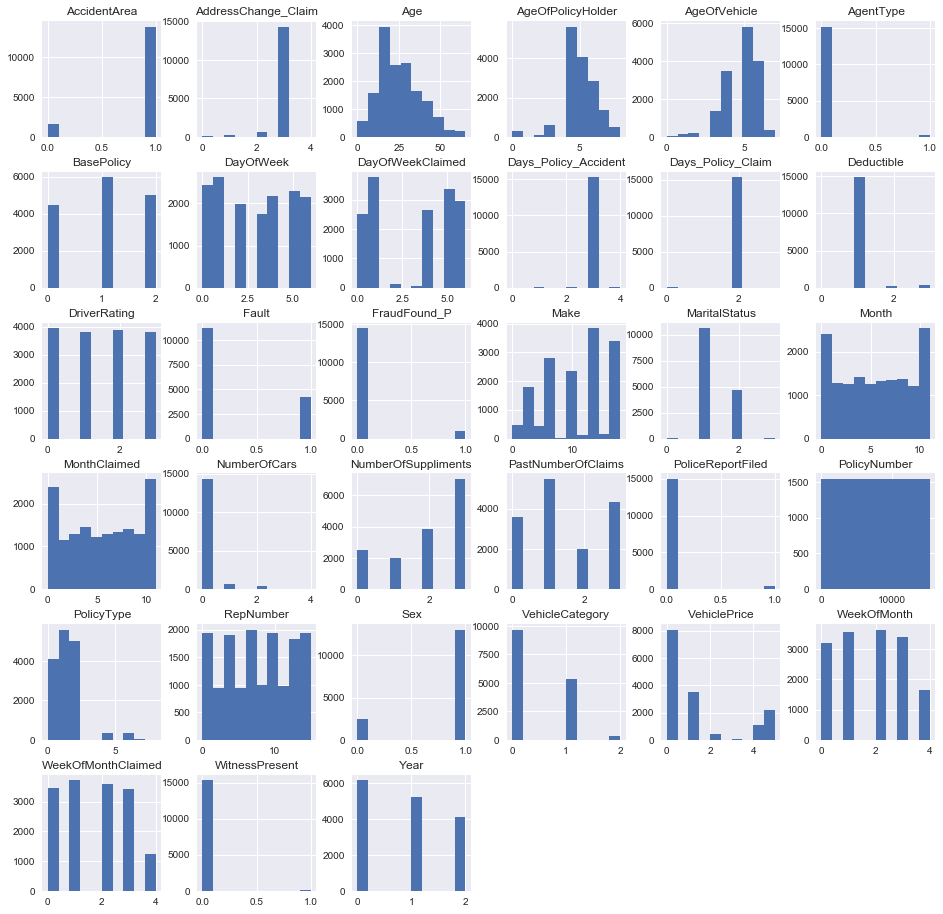

In [73]:
X.hist(figsize=(16,16))

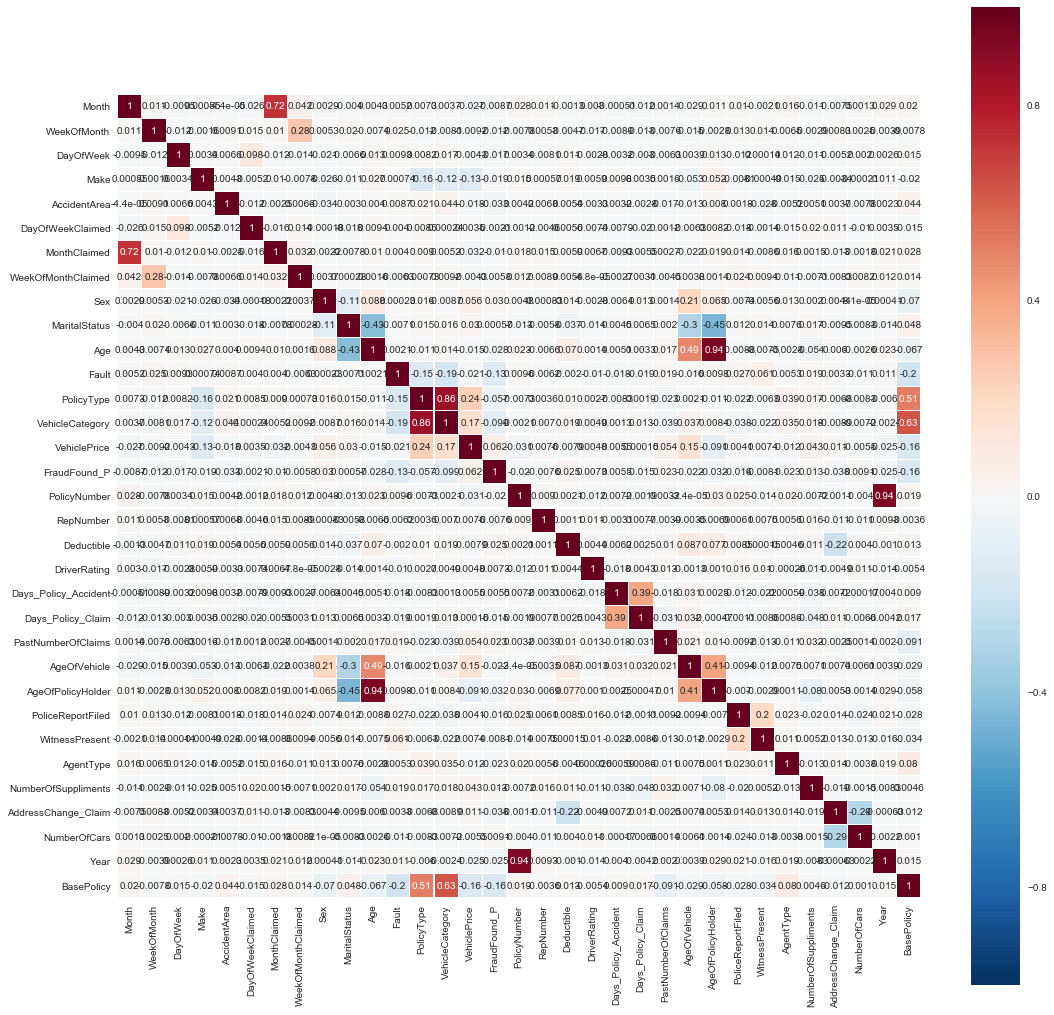

In [11]:
colormap=plt.cm.viridis
plt.figure(figsize=(18,18))
sns.heatmap(X.corr(),linewidths=0.1,vmax=1.0,square=True,linecolor='white',annot=True)

### Calculating correlation of the dependent variable with the dependent variables

In [75]:
X.corr().FraudFound_P.sort_values()

BasePolicy             -0.157079
Fault                  -0.131389
VehicleCategory        -0.099198
PolicyType             -0.057057
AddressChange_Claim    -0.037640
AccidentArea           -0.033499
AgeOfPolicyHolder      -0.031966
Age                    -0.027728
Year                   -0.024760
AgentType              -0.022978
AgeOfVehicle           -0.022236
PolicyNumber           -0.020345
Make                   -0.019187
DayOfWeek              -0.017456
PoliceReportFiled      -0.016007
Days_Policy_Claim      -0.015400
WeekOfMonth            -0.011861
MonthClaimed           -0.010272
Month                  -0.008670
WitnessPresent         -0.008057
RepNumber              -0.007551
WeekOfMonthClaimed     -0.005761
DayOfWeekClaimed       -0.002108
MaritalStatus           0.000568
Days_Policy_Accident    0.005529
DriverRating            0.007266
NumberOfCars            0.009109
NumberOfSuppliments     0.013264
PastNumberOfClaims      0.023363
Deductible              0.025281
Sex       

In [76]:
tmp=pd.read_excel('C:/Users/Kaumil/Documents/machine learning stuff/Python files/claims.csv.xlsx')
X_filter=tmp[['Make','AccidentArea','Sex','MaritalStatus','Age','Fault','VehicleCategory','VehiclePrice','FraudFound_P','DriverRating','AgeOfVehicle','AgeOfPolicyHolder','PoliceReportFiled','WitnessPresent','BasePolicy']]

In [77]:
for column_name in list(X_filter):
    X_filter[column_name]=X_filter[column_name].astype('category')
    X_filter[column_name]=X_filter[column_name].cat.codes

C:\Users\Kaumil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Kaumil\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [78]:
#X_filter.to_csv('C:/Users/Kaumil/Documents/machine learning stuff/Python files/claim_filter.csv',index=False)

In [79]:
y=X_filter['FraudFound_P']
X=X_filter.drop(['FraudFound_P'],axis=1)
skf=StratifiedKFold(n_splits=10)

### Constructing interaction term ASM from Age,Marital Status and Sex

In [80]:
X.loc[X['Age']<=16,'Age']=0
X.loc[(X['Age']>16) & (X['Age']<=32),'Age']=1
X.loc[(X['Age']>32) & (X['Age']<=48),'Age']=2
X.loc[(X['Age']>48) & (X['Age']<=54),'Age']=3
X.loc[(X['Age']>54) & (X['Age']<=60),'Age']=4
X.loc[(X['Age']>60) & (X['Age']<=64),'Age']=5
X.loc[(X['Age']>64),'Age']=6

X['ASM']=X['Age']+X['MaritalStatus']+X['Sex']

X=X.drop(['Age','MaritalStatus','Sex'],axis=1)

for i in range(len(X['Fault'])):
    if X['Fault'][i]==1:
        X['Fault'][i]=3
    else:
        X['Fault'][i]=-1

### Constructing correlation matrix,histogram and heatmap after removing the irrelevant features

In [81]:
X.corr()

,Make,AccidentArea,Fault,VehicleCategory,VehiclePrice,DriverRating,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,BasePolicy,ASM
Make,1.000000,0.004274,0.000741,-0.117638,-0.126554,0.005900,-0.052966,0.052117,-0.008074,-0.000487,-0.019868,-0.001038
AccidentArea,0.004274,1.000000,0.008713,0.043950,-0.017562,-0.003323,-0.012642,0.007964,0.001754,-0.028362,0.043798,-0.008563
Fault,0.000741,0.008713,1.000000,-0.185973,-0.020768,-0.010277,-0.015600,0.009814,0.027246,0.061036,-0.200722,-0.004950
VehicleCategory,-0.117638,0.043950,-0.185973,1.000000,0.168737,0.004930,0.037196,0.008430,-0.038407,-0.021920,0.631512,0.014309
VehiclePrice,-0.126554,-0.017562,-0.020768,0.168737,1.000000,0.004820,0.147010,-0.091214,0.004103,0.007356,-0.161209,0.053117
DriverRating,0.005900,-0.003323,-0.010277,0.004930,0.004820,1.000000,-0.001333,0.001045,0.015947,0.010489,-0.005419,-0.008766
AgeOfVehicle,-0.052966,-0.012642,-0.015600,0.037196,0.147010,-0.001333,1.000000,0.405090,-0.009381,-0.011799,-0.028980,0.372513
AgeOfPolicyHolder,0.052117,0.007964,0.009814,0.008430,-0.091214,0.001045,0.405090,1.000000,-0.006994,-0.002850,-0.057632,0.606400
PoliceReportFiled,-0.008074,0.001754,0.027246,-0.038407,0.004103,0.015947,-0.009381,-0.006994,1.000000,0.198096,-0.028028,-0.005136
WitnessPresent,-0.000487,-0.028362,0.061036,-0.021920,0.007356,0.010489,-0.011799,-0.002850,0.198096,1.000000,-0.034485,-0.004282


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029B077E1FD0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000029B01E1D9E8>]], dtype=object)

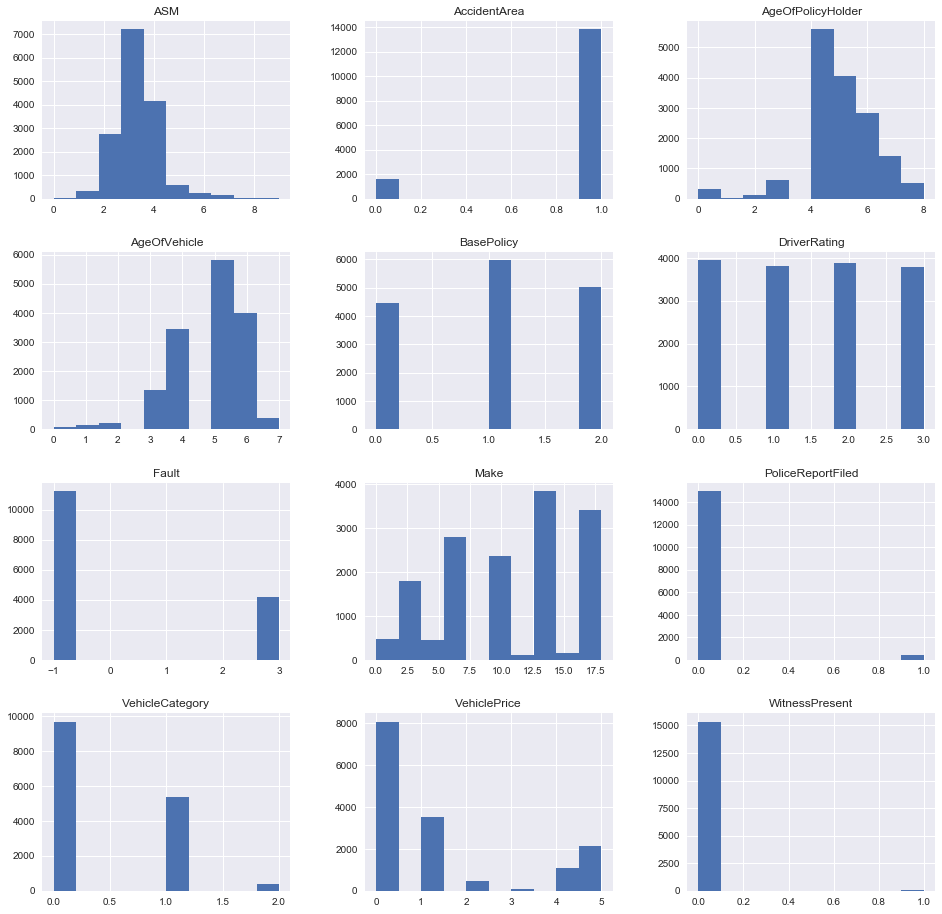

In [82]:
X.hist(figsize=(16,16))

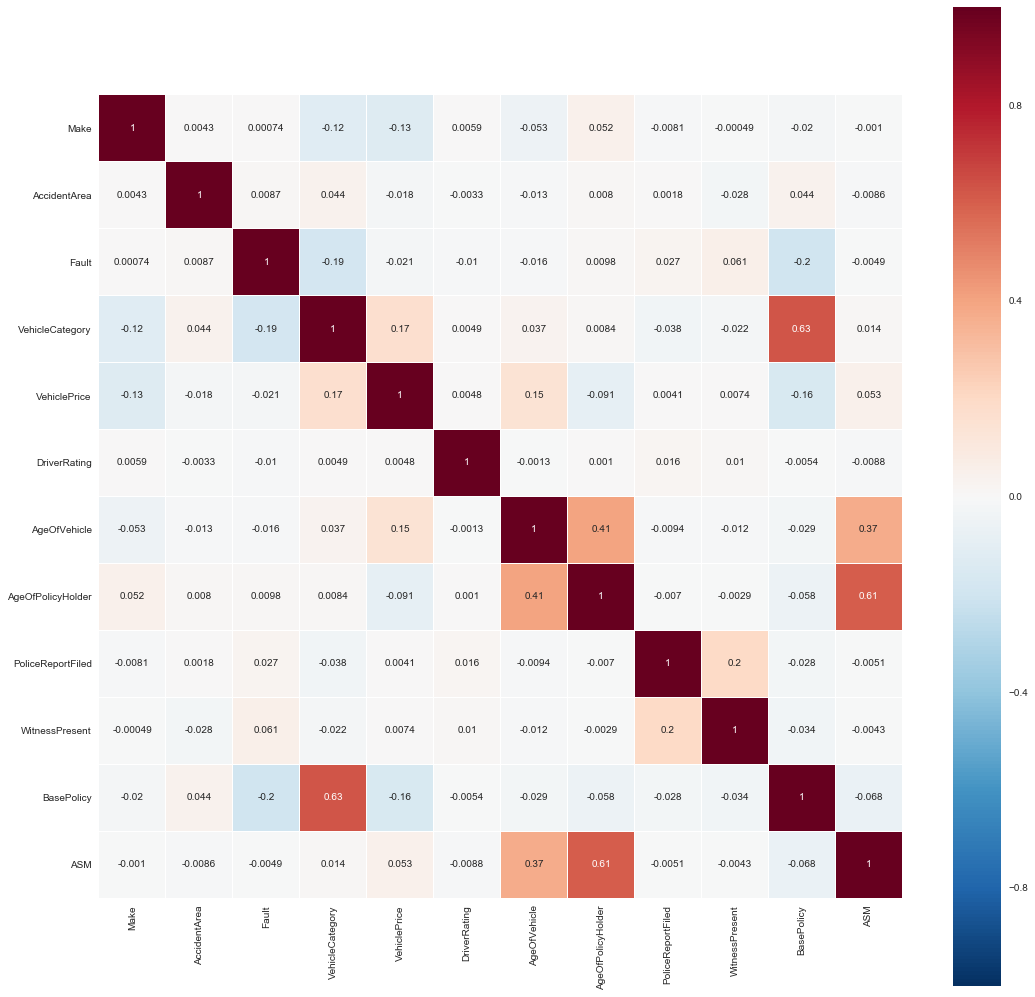

In [83]:
colormap=plt.cm.viridis
plt.figure(figsize=(18,18))
sns.heatmap(X.corr(),linewidths=0.1,vmax=1.0,square=True,linecolor='white',annot=True)

In [90]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

### Splitting the dataset into train set and test set

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [85]:
#def plot_roc_curve(fpr,tpr,label=None):
    #plt.plot(fpr,tpr,linewidth=2,label=label)
    #plt.plot([0,1],[0,1],'k--')
    #plt.xlabel('False Positive Rate',fontsize=16)
    #plt.ylabel('True Positive Rate',fontsize=16)

## Model testing

## StratifiedKFold along with SVC

Stratified K Fold using SVC Classifier and 'rbf' kernel:
    <br>N-splits->10
    <br>Accuracy->94.029%

In [60]:
svc_rbf=SVC(random_state=0)
for train_index,test_index in skf.split(X,y):
    svc_rbf.fit(X.loc[train_index],y.loc[train_index])
    y_pred=svc_rbf.predict(X.loc[test_index])
    print(accuracy_score(y.loc[test_index],y_pred))

0.939727802981
0.939727802981
0.939727802981
0.940337224384
0.940337224384
0.940337224384
0.940337224384
0.940298507463
0.940298507463
0.940298507463


In [61]:
#svc=SVC(kernel='poly',random_state=42)
#for train_index,test_index in skf.split(X,y):
    #svc.fit(X.loc[train_index],y.loc[train_index])
    #y_pred=svc.predict(X.loc[test_index])
    #print(accuracy_score(y.loc[test_index],y_pred))

Stratified K Fold using SVC Classifier and 'linear' kernel:
    <br>N-splits->10
    <br>Accuracy->94.029%

In [63]:
svc_linear=SVC(kernel='linear',random_state=0)
for train_index,test_index in skf.split(X,y):
    svc_linear.fit(X.loc[train_index],y.loc[train_index])
    y_pred=svc_linear.predict(X.loc[test_index])
    print(accuracy_score(y.loc[test_index],y_pred))

0.939727802981
0.939727802981
0.939727802981
0.940337224384
0.940337224384
0.940337224384
0.940337224384
0.940298507463
0.940298507463
0.940298507463


## SVC Classifier

SVC Classifier with 'rbf' kernel:
    <br>Accuracy->94.007%
    <br>Precision->88%
    <br>Recall->94%
    <br>f1-score->0.91

In [100]:
svc_kernel_rbf=SVC(kernel='rbf',random_state=0,probability=True)
svc_kernel_rbf.fit(X_train,y_train)
y_pred=svc_kernel_rbf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.940077821012
[[3624    0]
 [ 231    0]]
             precision    recall  f1-score   support

          0       0.94      1.00      0.97      3624
          1       0.00      0.00      0.00       231

avg / total       0.88      0.94      0.91      3855



C:\Users\Kaumil\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [101]:
y_probas_svc_krbf=cross_val_predict(svc_kernel_rbf,X_train,y_train,cv=3,method='predict_proba')
y_scores_svc_krbf=y_probas_svc_krbf[:,1]
fpr_svc_krbf,tpr_svc_krbf,thresholds_svc_krbf=roc_curve(y_train,y_scores_svc_krbf)

SVC Classifier with 'linear' kernel:
    <br>Accuracy->94.007%
    <br>Precision->88%
    <br>Recall->94%
    <br>f1-score->0.91

In [103]:
svc_kernel_linear=SVC(kernel='linear',random_state=0,probability=True)
svc_kernel_linear.fit(X_train,y_train)
y_pred=svc_kernel_linear.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.940077821012
[[3624    0]
 [ 231    0]]
             precision    recall  f1-score   support

          0       0.94      1.00      0.97      3624
          1       0.00      0.00      0.00       231

avg / total       0.88      0.94      0.91      3855



C:\Users\Kaumil\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [105]:
y_probas_svckl=cross_val_predict(svc_kernel_linear,X_train,y_train,cv=3,method='predict_proba')
y_scores_svckl=y_probas_svckl[:,1]
fpr_svckl,tpr_svckl,thresholds_svckl=roc_curve(y_train,y_scores_svckl)

##### SVC with polynomial kernel does not work on the given dataset

In [67]:
#svc_kernel_poly=SVC(kernel='poly',random_state=0,probability=True)
#svc_kernel_poly.fit(X_train,y_train)
#y_pred=svc_kernel_poly.predict(X_test)
#print(accuracy_score(y_test,y_pred))
#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))

## Random Forest Classifier

Random Forest Classifier:
    <br>Accuracy->92.684%
    <br>Precision->90%
    <br>Recall->93%
    <br>f1-score->0.91

In [107]:
rnd_clf=RandomForestClassifier(random_state=0)
rnd_clf.fit(X_train,y_train)
y_pred=rnd_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.926848249027
[[3560   64]
 [ 218   13]]
             precision    recall  f1-score   support

          0       0.94      0.98      0.96      3624
          1       0.17      0.06      0.08       231

avg / total       0.90      0.93      0.91      3855



In [108]:
y_probas_rnd=cross_val_predict(rnd_clf,X_train,y_train,cv=3,method='predict_proba')
y_scores_rnd=y_probas_rnd[:,1]
fpr_rnd,tpr_rnd,thresholds_rnd=roc_curve(y_train,y_scores_rnd)

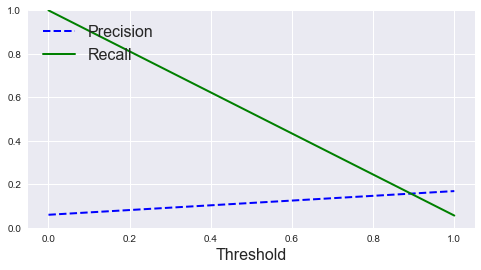

In [109]:
precisions,recalls,thresholds=precision_recall_curve(y_test,y_pred)
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

## Bagging Classifier using RandomForestClassification

Bagging Classifier using Random Forest Classifier:
    <br>Accuracy->94.007%
    <br>Precision->88%
    <br>Recall->94%
    <br>f1-score->0.91

In [110]:
bag_clf=BaggingClassifier(RandomForestClassifier(random_state=0),n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1,random_state=42)
bag_clf.fit(X_train,y_train)
y_pred=bag_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.940077821012
[[3624    0]
 [ 231    0]]
             precision    recall  f1-score   support

          0       0.94      1.00      0.97      3624
          1       0.00      0.00      0.00       231

avg / total       0.88      0.94      0.91      3855



C:\Users\Kaumil\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [111]:
y_probas_bag=cross_val_predict(bag_clf,X_train,y_train,cv=3,method='predict_proba')
y_scores_bag=y_probas_bag[:,1]
fpr_bag,tpr_bag,thresholds_bag=roc_curve(y_train,y_scores_bag)

## Logistic Regression

Logistic Regression:
    <br>Accuracy->94.007%
    <br>Precision->88%
    <br>Recall->94%
    <br>f1-score->0.91

In [113]:
log_clf=LogisticRegression(random_state=0)
log_clf.fit(X_train,y_train)
y_pred=log_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.940077821012
[[3624    0]
 [ 231    0]]
             precision    recall  f1-score   support

          0       0.94      1.00      0.97      3624
          1       0.00      0.00      0.00       231

avg / total       0.88      0.94      0.91      3855



C:\Users\Kaumil\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [114]:
y_probas_log=cross_val_predict(log_clf,X_train,y_train,cv=3,method='predict_proba')
y_scores_log=y_probas_log[:,1]
fpr_log,tpr_log,thresholds_log=roc_curve(y_train,y_scores_log)

## KNNeighbours

K Nearest Neighbours Classifier:
    <br>Accuracy->93.722%
    <br>Precision->90%
    <br>Recall->94%
    <br>f1-score->0.91

In [116]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
y_pred=knn_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.937224383917
[[3607   17]
 [ 225    6]]
             precision    recall  f1-score   support

          0       0.94      1.00      0.97      3624
          1       0.26      0.03      0.05       231

avg / total       0.90      0.94      0.91      3855



In [117]:
y_probas_knn=cross_val_predict(knn_clf,X_train,y_train,cv=3,method='predict_proba')
y_scores_knn=y_probas_knn[:,1]
fpr_knn,tpr_knn,thresholds_knn=roc_curve(y_train,y_scores_knn)

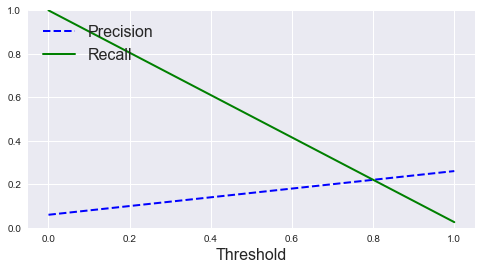

In [118]:
precisions,recalls,thresholds=precision_recall_curve(y_test,y_pred)
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

## LDA

Linear DIscriminant Analysis Classifier:
    <br>Accuracy->94.007%
    <br>Precision->88%
    <br>Recall->94%
    <br>f1-score->0.91

In [119]:
lda_clf=LinearDiscriminantAnalysis()
lda_clf.fit(X_train,y_train)
y_pred=lda_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.940077821012
[[3624    0]
 [ 231    0]]
             precision    recall  f1-score   support

          0       0.94      1.00      0.97      3624
          1       0.00      0.00      0.00       231

avg / total       0.88      0.94      0.91      3855



C:\Users\Kaumil\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [120]:
y_probas_lda=cross_val_predict(lda_clf,X_train,y_train,cv=3,method='predict_proba')
y_scores_lda=y_probas_lda[:,1]
fpr_lda,tpr_lda,thresholds_lda=roc_curve(y_train,y_scores_lda)

## GaussianNB

GaussianNB Classifier:
    <br>Accuracy->91.232%
    <br>Precision->90%
    <br>Recall->91%
    <br>f1-score->0.91

In [122]:
gnb_clf=GaussianNB()
gnb_clf.fit(X_train,y_train)
y_pred=gnb_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.912321660182
[[3484  140]
 [ 198   33]]
             precision    recall  f1-score   support

          0       0.95      0.96      0.95      3624
          1       0.19      0.14      0.16       231

avg / total       0.90      0.91      0.91      3855



In [123]:
y_probas_gnb=cross_val_predict(gnb_clf,X_train,y_train,cv=3,method='predict_proba')
y_scores_gnb=y_probas_gnb[:,1]
fpr_gnb,tpr_gnb,thresholds_gnb=roc_curve(y_train,y_scores_gnb)

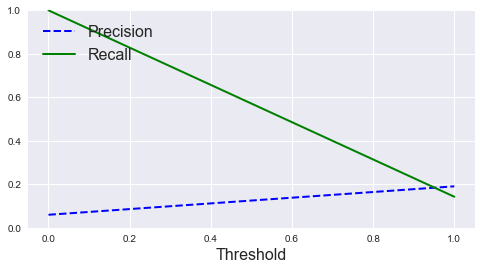

In [124]:
precisions,recalls,thresholds=precision_recall_curve(y_test,y_pred)
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

## Decision Tree Classifier

Decision Tree Classifier:
    <br>Accuracy->90.791%
    <br>Precision->90%
    <br>Recall->91%
    <br>f1-score->0.90

In [97]:
dct_clf=DecisionTreeClassifier(random_state=0)
dct_clf.fit(X_train,y_train)
y_pred=dct_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.907911802853
[[3474  150]
 [ 205   26]]
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      3624
          1       0.15      0.11      0.13       231

avg / total       0.90      0.91      0.90      3855



In [98]:
y_probas_dct=cross_val_predict(dct_clf,X_train,y_train,cv=3,method='predict_proba')
y_scores_dct=y_probas_dct[:,1]
fpr_dct,tpr_dct,thresholds_dct=roc_curve(y_train,y_scores_dct)

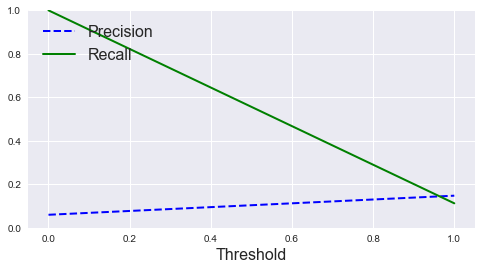

In [99]:
precisions,recalls,thresholds=precision_recall_curve(y_test,y_pred)
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

## Gradient Boosting Classifier

#### BEST CLASSIFIER

Gradient Boosting Classifier:
    <br>Accuracy->94.059%
    <br>Precision->94%
    <br>Recall->94%
    <br>f1-score->0.91

In [94]:
gbm_clf=GradientBoostingClassifier(random_state=0)
gbm_clf.fit(X_train,y_train)
y_pred=gbm_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.940596627756
[[3624    0]
 [ 229    2]]
             precision    recall  f1-score   support

          0       0.94      1.00      0.97      3624
          1       1.00      0.01      0.02       231

avg / total       0.94      0.94      0.91      3855



In [95]:
y_probas_gbm=cross_val_predict(gbm_clf,X_train,y_train,cv=3,method='predict_proba')
y_scores_gbm=y_probas_gbm[:,1]
fpr_gbm,tpr_gbm,thresholds_gbm=roc_curve(y_train,y_scores_gbm)

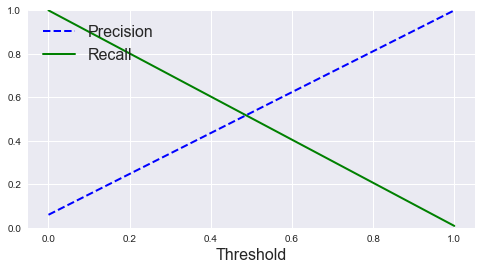

In [96]:
precisions,recalls,thresholds=precision_recall_curve(y_test,y_pred)
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

If there is a demand for an increased recall,then the threshold value should be decreased and vice-versa

## XGBoost Classifier

XGBoost Classifier:
    <br>Accuracy->94.007%
    <br>Precision->88%
    <br>Recall->94%
    <br>f1-score->0.91

In [125]:
xg_clf=XGBClassifier()
xg_clf.fit(X_train,y_train)
y_pred=xg_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.940077821012
[[3624    0]
 [ 231    0]]
             precision    recall  f1-score   support

          0       0.94      1.00      0.97      3624
          1       0.00      0.00      0.00       231

avg / total       0.88      0.94      0.91      3855



C:\Users\Kaumil\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [126]:
y_probas_xg=cross_val_predict(xg_clf,X_train,y_train,cv=3,method='predict_proba')
y_scores_xg=y_probas_xg[:,1]
fpr_xg,tpr_xg,thresholds_xg=roc_curve(y_train,y_scores_xg)

## Extra Tree Classifier

Extra Tree Classifier:
    <br>Accuracy->91.024%
    <br>Precision->90%
    <br>Recall->91%
    <br>f1-score->0.90

In [128]:
ext_clf=ExtraTreeClassifier(random_state=42)
ext_clf.fit(X_train,y_train)
y_pred=ext_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.910246433204
[[3484  140]
 [ 206   25]]
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      3624
          1       0.15      0.11      0.13       231

avg / total       0.90      0.91      0.90      3855



In [129]:
y_probas_ext=cross_val_predict(ext_clf,X_train,y_train,cv=3,method='predict_proba')
y_scores_ext=y_probas_ext[:,1]
fpr_ext,tpr_ext,thresholds_ext=roc_curve(y_train,y_scores_ext)

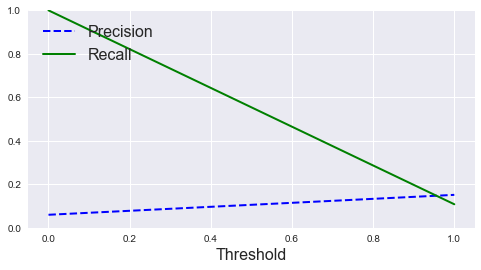

In [130]:
precisions,recalls,thresholds=precision_recall_curve(y_test,y_pred)
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

## ROC Curves for different classifiers

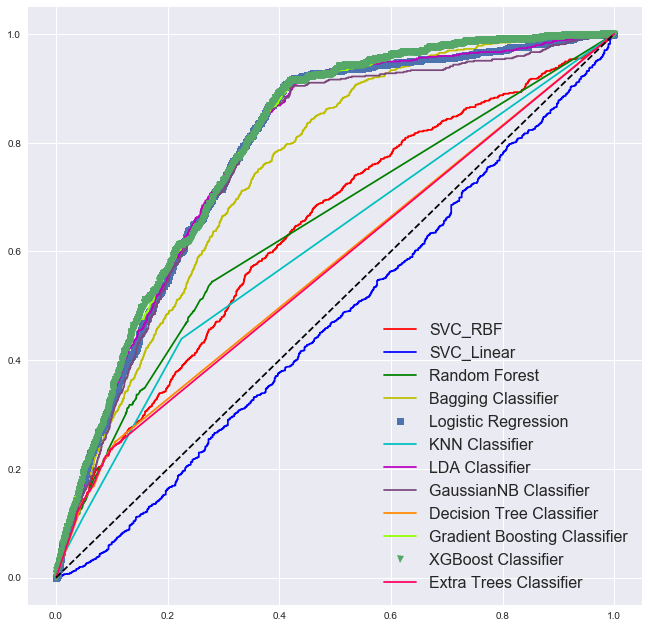

In [92]:
plt.figure(figsize=(11,11))
plt.plot(fpr_svc_krbf,tpr_svc_krbf,'r',label='SVC_RBF')
plt.plot(fpr_svckl,tpr_svckl,'b',label='SVC_Linear')
plt.plot(fpr_rnd,tpr_rnd,'g',label='Random Forest')
plt.plot(fpr_bag,tpr_bag,'y',label='Bagging Classifier')
plt.plot(fpr_log,tpr_log,'s',label='Logistic Regression')
plt.plot(fpr_knn,tpr_knn,'c',label='KNN Classifier')
plt.plot(fpr_lda,tpr_lda,'m',label='LDA Classifier')
plt.plot(fpr_gnb,tpr_gnb,'#7c497c',label='GaussianNB Classifier')
plt.plot(fpr_dct,tpr_dct,'#ff8800',label='Decision Tree Classifier')
plt.plot(fpr_gbm,tpr_gbm,'#94ff00',label='Gradient Boosting Classifier')
plt.plot(fpr_xg,tpr_xg,'v',label='XGBoost Classifier')
plt.plot(fpr_ext,tpr_ext,'#ff0061',label='Extra Trees Classifier')
plt.plot([0,1],[0,1],'k--')
plt.legend(loc='lower right',fontsize=16)
plt.show()

## Statistical Tests

## ANOVA

In [83]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Users\Kaumil\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [31]:
X.corr().FraudFound_P.sort_values()

BasePolicy          -0.157079
VehicleCategory     -0.099198
AgeOfPolicyHolder   -0.031966
AgeOfVehicle        -0.022236
Make                -0.019187
PoliceReportFiled   -0.016007
ASM                 -0.008372
WitnessPresent      -0.008057
DriverRating         0.007266
AccidentArea         0.033499
VehiclePrice         0.061541
Fault                0.131437
FraudFound_P         1.000000
Name: FraudFound_P, dtype: float64

In [32]:
X.columns

Index(['Make', 'AccidentArea', 'Fault', 'VehicleCategory', 'VehiclePrice',
       'FraudFound_P', 'DriverRating', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'BasePolicy', 'ASM'],
      dtype='object')

In [48]:
mod=ols('FraudFound_P ~ BasePolicy*VehicleCategory*Fault*VehiclePrice',data=X).fit()

In [49]:
aov_table=sm.stats.anova_lm(mod,typ=2)
print(aov_table)

                                                   sum_sq       df  \
BasePolicy                                       9.216779      1.0   
VehicleCategory                                  0.322683      1.0   
BasePolicy:VehicleCategory                       0.050401      1.0   
Fault                                           23.551880      1.0   
BasePolicy:Fault                                 2.971598      1.0   
VehicleCategory:Fault                            0.011679      1.0   
BasePolicy:VehicleCategory:Fault                 0.002862      1.0   
VehiclePrice                                     0.662778      1.0   
BasePolicy:VehiclePrice                          0.105040      1.0   
VehicleCategory:VehiclePrice                     0.178694      1.0   
BasePolicy:VehicleCategory:VehiclePrice          0.120588      1.0   
Fault:VehiclePrice                               0.070202      1.0   
BasePolicy:Fault:VehiclePrice                    0.000452      1.0   
VehicleCategory:Faul

## OLS

In [23]:
X=sm.add_constant(X_test)
est=sm.OLS(y_test,X_test)
est2=est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           FraudFound_P   R-squared:                       9.283
Model:                            OLS   Adj. R-squared:                  9.309
Method:                 Least Squares   F-statistic:                    -358.9
Date:                Thu, 07 Dec 2017   Prob (F-statistic):               1.00
Time:                        10:13:03   Log-Likelihood:                 165.99
No. Observations:                3855   AIC:                            -308.0
Df Residuals:                    3843   BIC:                            -232.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Make                  0.0014      0.00

## AIC

In [132]:
fitted_params=stats.gamma.fit(y_test)
fitted_params

(0.44681626205769592, -3.484515218343581e-30, 0.53200651241453145)

In [133]:
logLik = np.sum( stats.gamma.logpdf(y_test, fitted_params[0], loc=fitted_params[1], scale=fitted_params[2]) )
k = len(fitted_params)
aic = 2*k - 2*(logLik)
aic

-267983.92559000337

## Z-Test

In [135]:
X_filter.columns

Index(['Make', 'AccidentArea', 'Sex', 'MaritalStatus', 'Age', 'Fault',
       'VehicleCategory', 'VehiclePrice', 'FraudFound_P', 'DriverRating',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'BasePolicy'],
      dtype='object')

In [139]:
X_z=X_filter[['Make' , 'AccidentArea' , 'Sex', 'MaritalStatus', 'Age','Fault','VehicleCategory',      'VehiclePrice',      'FraudFound_P',
            'DriverRating',      'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled',    'WitnessPresent','BasePolicy']]
X_z.loc[X_z['Age']<=16,'Age']=0
X_z.loc[(X_z['Age']>16) & (X_z['Age']<=32),'Age']=1
X_z.loc[(X_z['Age']>32) & (X_z['Age']<=48),'Age']=2
X_z.loc[(X_z['Age']>48) & (X_z['Age']<=54),'Age']=3
X_z.loc[(X_z['Age']>54) & (X_z['Age']<=60),'Age']=4
X_z.loc[(X_z['Age']>60) & (X_z['Age']<=64),'Age']=5
X_z.loc[(X_z['Age']>64),'Age']=6

X_z['ASM']=X_z['Age']+X_z['MaritalStatus']+X_z['Sex']

X_z=X_z.drop(['Age','MaritalStatus','Sex'],axis=1)

for i in range(len(X_z['Fault'])):
    if X_z['Fault'][i]==1:
        X_z['Fault'][i]=3
    else:
        X_z['Fault'][i]=-1

In [142]:
L=[]
for i in X_z:
    x1=X_z[i]
    #x2=df['Fault']
    z=weightstats.ztest(x1, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
    L.append(z)

In [143]:
L

[(237.74782590274566, 0.0),
 (365.19528439545991, 0.0),
 (6.0642349860466362, 1.3258319373067017e-09),
 (91.76002155160846, 0.0),
 (87.299471419689141, 0.0),
 (31.332127509175383, 1.7044397231975166e-215),
 (165.03771356811612, 0.0),
 (522.6793818590603, 0.0),
 (435.17379444955753, 0.0),
 (20.980711017310377, 9.8411038719373647e-98),
 (9.3535002608499589, 8.4794096198557034e-21),
 (164.48657768713318, 0.0),
 (406.34702740996335, 0.0)]

In [144]:
L1=[]
for i in X_z:
    for j in X_z:
        x1=X_z[i]
        x2=X_z[j]
        z=weightstats.ztest(x1,x2, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
        L1.append(z)

In [145]:
L1

[(0.0, 1.0),
 (216.31858403067972, 0.0),
 (223.37406616341386, 0.0),
 (227.20945814264297, 0.0),
 (195.87245139136908, 0.0),
 (236.10292653950324, 0.0),
 (198.37153910321189, 0.0),
 (122.12644959103829, 0.0),
 (118.68838905167505, 0.0),
 (236.98085591363915, 0.0),
 (237.5913275891761, 0.0),
 (211.08663431432049, 0.0),
 (159.39952374002743, 0.0),
 (-216.31858403067972, 0.0),
 (0.0, 1.0),
 (55.677067135609938, 0.0),
 (99.927073645423803, 0.0),
 (-26.364288982291658, 3.5198456747953358e-153),
 (268.94535008467864, 0.0),
 (-63.302125573053694, 0.0),
 (-410.6396890336103, 0.0),
 (-347.25318951841888, 0.0),
 (311.51896305717105, 0.0),
 (352.41076394302257, 0.0),
 (-20.697667170621575, 3.6354667141517552e-95),
 (-279.969106889297, 0.0),
 (-223.37406616341386, 0.0),
 (-55.677067135609938, 0.0),
 (0.0, 1.0),
 (-20.790296653193053, 5.2982332848776737e-96),
 (-58.494559863462754, 0.0),
 (1.8706036132767789, 0.061400043416005433),
 (-82.748258143959347, 0.0),
 (-276.88422667194499, 0.0),
 (-263.82